<a href="https://www.kaggle.com/code/amosjeromeolal/email-classification-using-naive-bayes?scriptVersionId=233704057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-classification-dataset/combined_data.csv
/kaggle/input/spamcsv/spam.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
df=pd.read_csv('/kaggle/input/email-spam-classification-dataset/combined_data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
print(df.columns.tolist())

['label', 'text']


In [5]:
# Step 2: Preprocessing to include stopword removal, lowercasing, etc.)
df['text'] = df['text'].str.lower().str.replace(r'\W', ' ', regex=True)

In [6]:
# Step 3: Vectorize text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.9,      # Ignore words in more than 90% of docs
    min_df=5,        # Ignore rare words appearing in <5 docs
    ngram_range=(1,2)  # Use unigrams and bigrams
)
#vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])


In [7]:
# Step 4: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Step 5: Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9837028160575195
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7938
           1       0.99      0.97      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



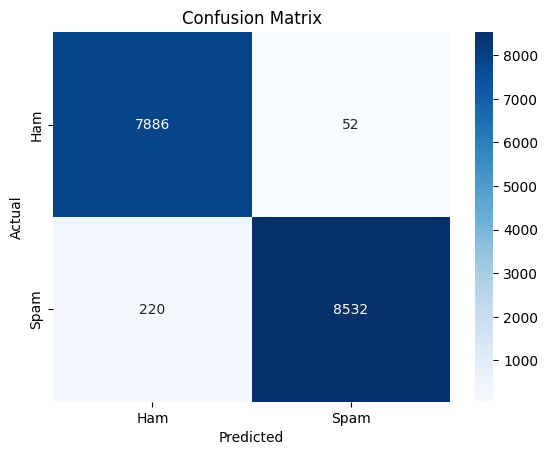

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


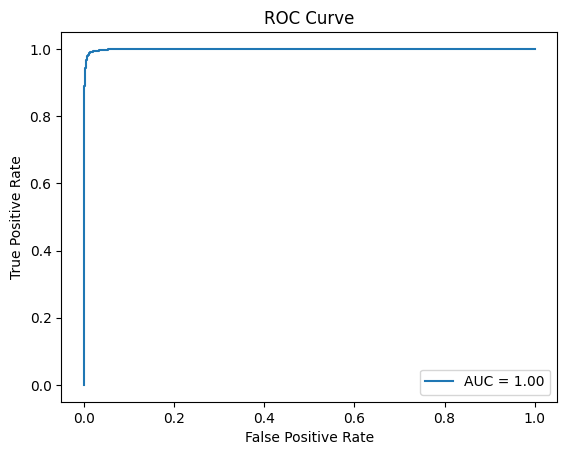

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [10]:
import joblib
joblib.dump(model, "spam_classifier_nb.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [11]:
# Example email(s) to classify
sample_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
    "Hey, can we reschedule our meeting to tomorrow?",
    "Get cheap meds online now, no prescription needed!",
    "Your invoice for the recent purchase is attached.",
    "Earn $$$ working from home, no experience required!"
]

# Preprocess just like training data
sample_emails_cleaned = [text.lower() for text in sample_emails]

# Transform using the same TF-IDF vectorizer
sample_vectors = vectorizer.transform(sample_emails_cleaned)

# Predict with your trained model
predictions = model.predict(sample_vectors)

# Print results
for email, pred in zip(sample_emails, predictions):
    label = "Spam" if pred == 1 else "Not Spam"
    print(f"📝 Email: {email}\n➡️ Prediction: {label}\n")


📝 Email: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.
➡️ Prediction: Spam

📝 Email: Hey, can we reschedule our meeting to tomorrow?
➡️ Prediction: Not Spam

📝 Email: Get cheap meds online now, no prescription needed!
➡️ Prediction: Spam

📝 Email: Your invoice for the recent purchase is attached.
➡️ Prediction: Not Spam

📝 Email: Earn $$$ working from home, no experience required!
➡️ Prediction: Spam

